In [29]:
%pylab inline
from IPython.display import Image
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [8]:
from glob import glob

base_images = sorted(glob("/Users/akeshavan/Dropbox/data/meningioma/tiles/sub*/base*.jpg"))
agg_images = sorted(glob("/Users/akeshavan/Dropbox/data/meningioma/tiles/sub*/agg*.png"))
truth_images = sorted(glob("/Users/akeshavan/Dropbox/data/meningioma/tiles/sub*/truth*.png"))

In [50]:
def nearest_sq(n):
    root_of_n = sqrt(n)
    floor_integer = int(root_of_n)
    ceil_integer = floor_integer + 1
    floor_integer_square = floor_integer * floor_integer
    ceil_integer_square = ceil_integer * ceil_integer
    floor_distance = n - floor_integer_square
    ceil_distance = ceil_integer_square - n
    if floor_distance < ceil_distance:
      return sqrt(floor_integer_square)
    else:
      return sqrt(ceil_integer_square)


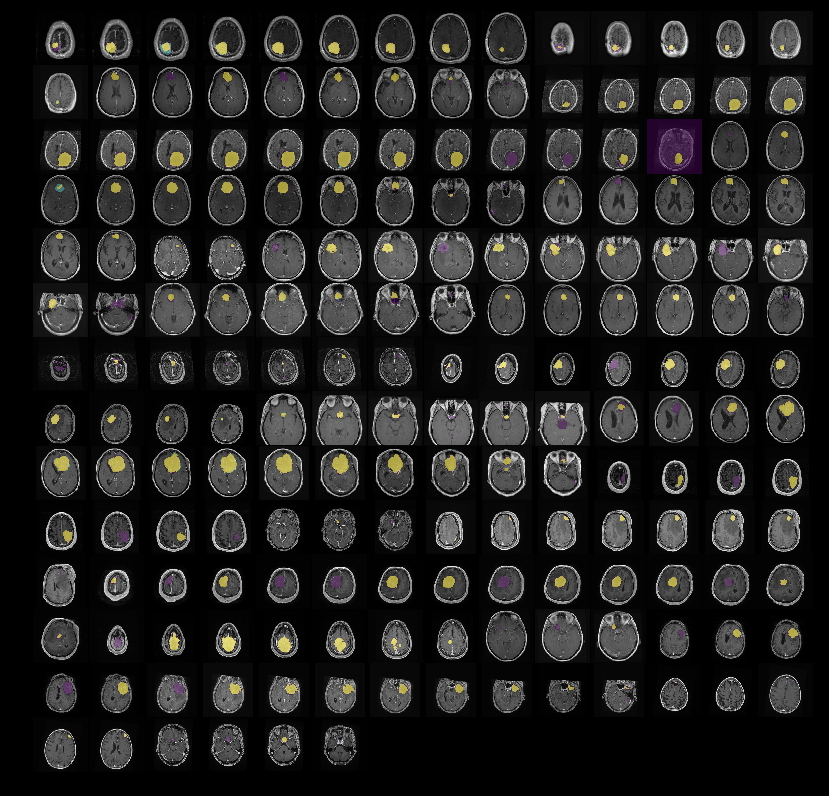

In [66]:
df = pd.DataFrame()
plt.style.use('dark_background')

N = int(nearest_sq(len(base_images)))
fig,axs = subplots(N,N, figsize=(N,N))
axs = axs.ravel()
fig.subplots_adjust(wspace=0, hspace=0)
[ax.axis("off") for ax in axs]

for i, base in enumerate(base_images):
    t = truth_images[i]
    a = agg_images[i]
    
    entry = {}
    sub = base.split("/")[-2]
    entry["sub"] = sub
    s = int(base.split("/")[-1].replace("base","").split(".")[0])
    entry["slice"] = s
    
    bdata = imread(base)
    tdata = imread(t).astype(np.float32)
    entry["n_truth_vox"] = (tdata > 0).sum()
    tdata[tdata==0] = np.nan
    
    adata = (imread(a)).astype(np.float32)
    entry["n_agg_vox"] = (adata > 0).sum()
    adata[adata==0] = np.nan
    
    ax = axs[i]
    ax.imshow(bdata)
    #ax.imshow(tdata, alpha=0.5)
    ax.imshow(adata, alpha=0.5)
    ax.axis("off")
    df = df.append(entry, ignore_index=True)
    

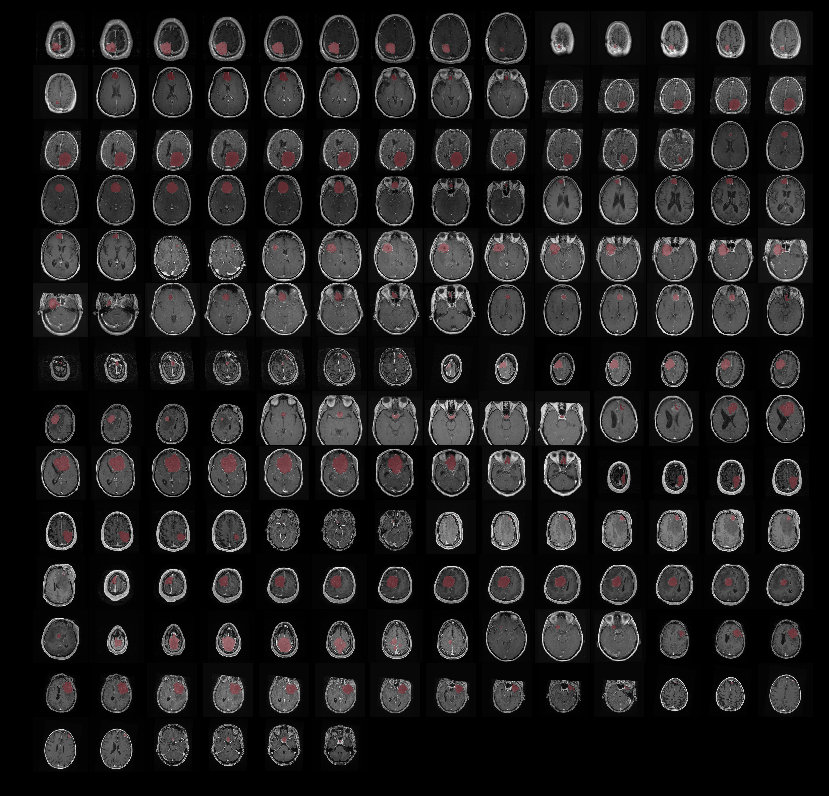

In [63]:
df = pd.DataFrame()

N = int(nearest_sq(len(base_images)))
fig,axs = subplots(N,N, figsize=(N,N))
plt.style.use('dark_background')
axs = axs.ravel()
fig.subplots_adjust(wspace=0, hspace=0)
[ax.axis("off") for ax in axs]

for i, base in enumerate(base_images):
    t = truth_images[i]
    a = agg_images[i]
    
    entry = {}
    sub = base.split("/")[-2]
    entry["sub"] = sub
    s = int(base.split("/")[-1].replace("base","").split(".")[0])
    entry["slice"] = s
    
    bdata = imread(base)
    tdata = (imread(t) > 0).astype(np.float32)
    entry["n_truth_vox"] = tdata.sum()
    tdata[tdata==0] = np.nan
    
    adata = (imread(a) > 0).astype(np.float32)
    entry["n_agg_vox"] = adata.sum()
    adata[adata==0] = np.nan
    
    ax = axs[i]
    ax.imshow(bdata)
    ax.imshow(tdata, alpha=0.5, cmap=cm.Reds_r)
    #ax.imshow(adata, alpha=0.5)
    ax.axis("off")
    df = df.append(entry, ignore_index=True)
    